In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mutual_info_score

In [2]:
df = pd.read_csv("./data/customer_churn_processed_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   country          10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
numeric_cols = df.select_dtypes("number").columns.drop(["exited", "hascrcard", "isactivemember"]).to_list()
categorical_cols = df.select_dtypes("object").columns.tolist() + ["hascrcard", "isactivemember"]

numeric_cols, categorical_cols

(['creditscore',
  'age',
  'tenure',
  'balance',
  'numofproducts',
  'estimatedsalary'],
 ['country', 'gender', 'hascrcard', 'isactivemember'])

#### Check the distribution of the target variable

In [5]:
# Check number of customers that churned and those that stayed

df["exited"].value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='exited', ylabel='count'>

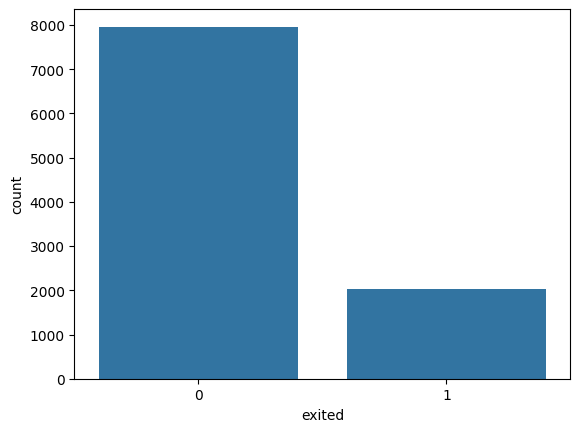

In [6]:
sns.barplot(df["exited"].value_counts())

In [7]:
# Check the proportion of customers that churned and those that stayed

df["exited"].value_counts(normalize=True)

exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

<Axes: xlabel='exited', ylabel='proportion'>

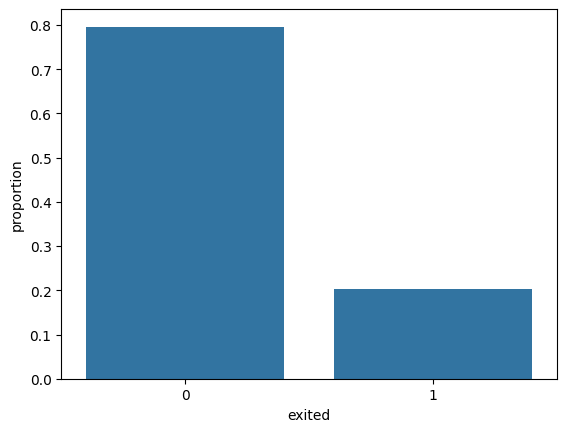

In [8]:
sns.barplot(df["exited"].value_counts(normalize=True))

### Numeric columns

In [9]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


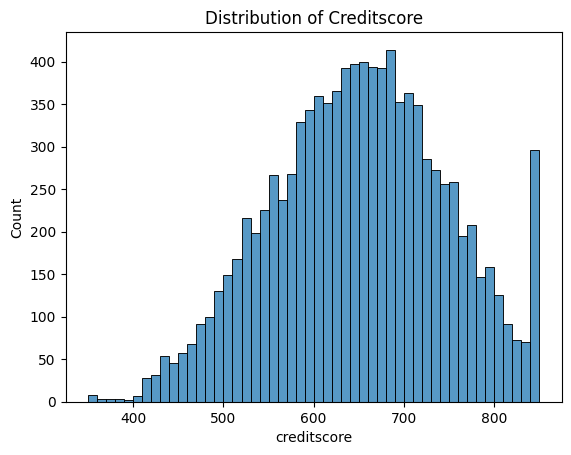

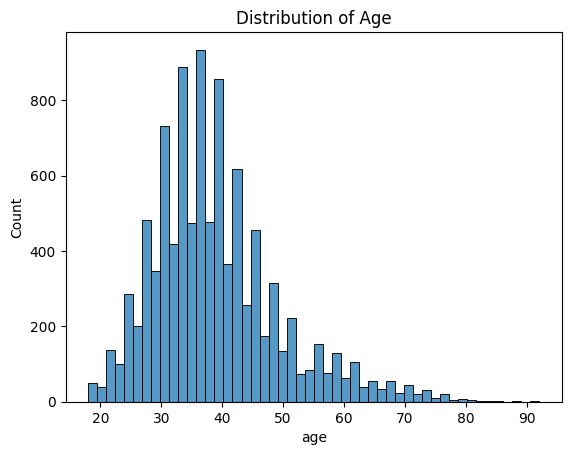

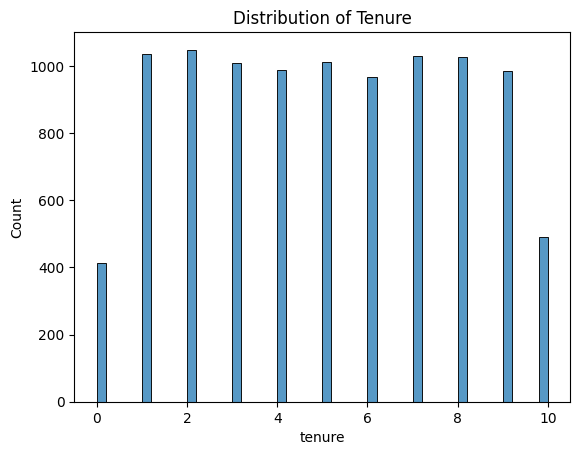

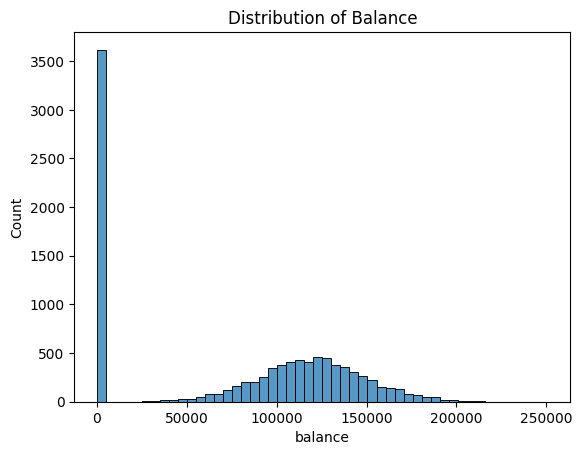

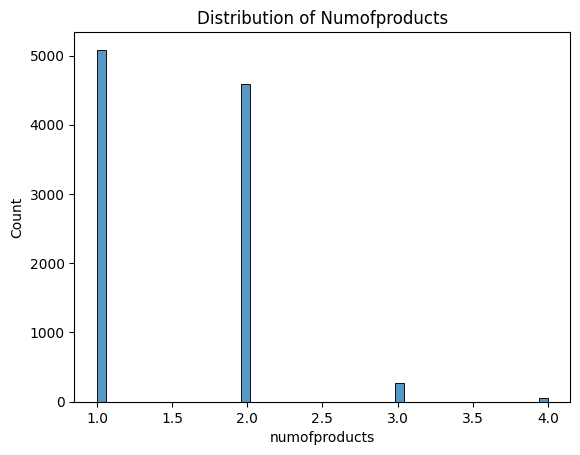

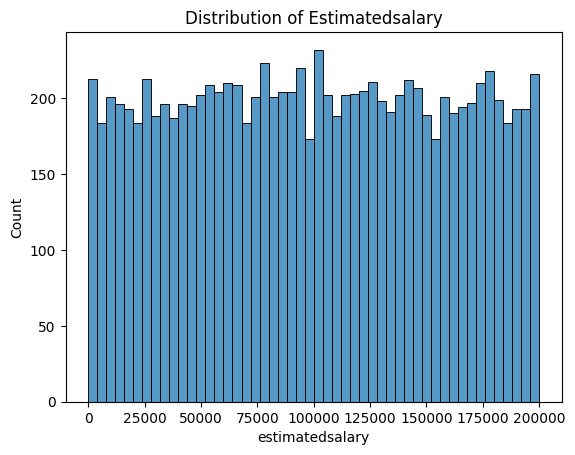

In [10]:
for col in numeric_cols:
    sns.histplot(df[col], bins=50)
    plt.title(f"Distribution of {col.title()}")
    plt.show()

### Explore categorical columns

Country
country
france     5014
germany    2509
spain      2477
Name: count, dtype: int64


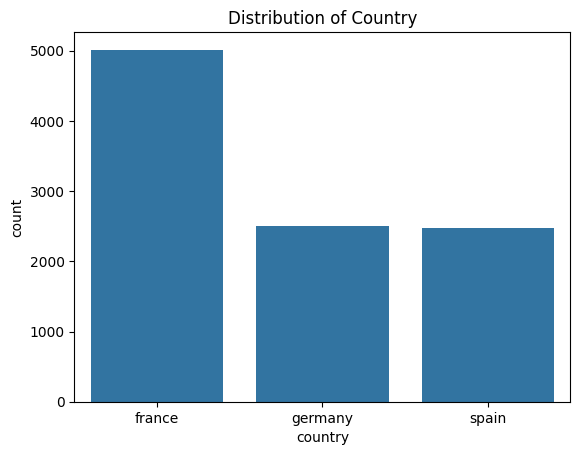

Gender
gender
male      5457
female    4543
Name: count, dtype: int64


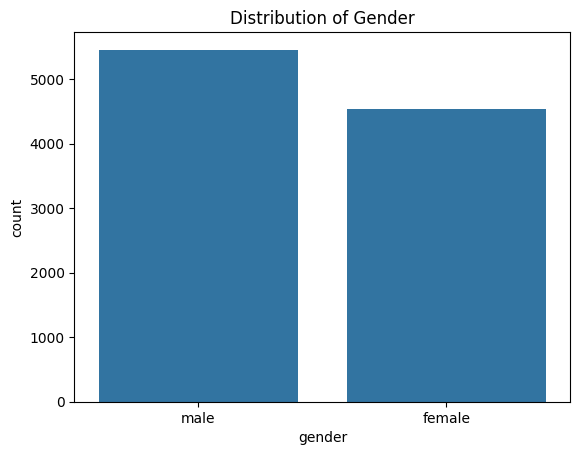

Hascrcard
hascrcard
1    7055
0    2945
Name: count, dtype: int64


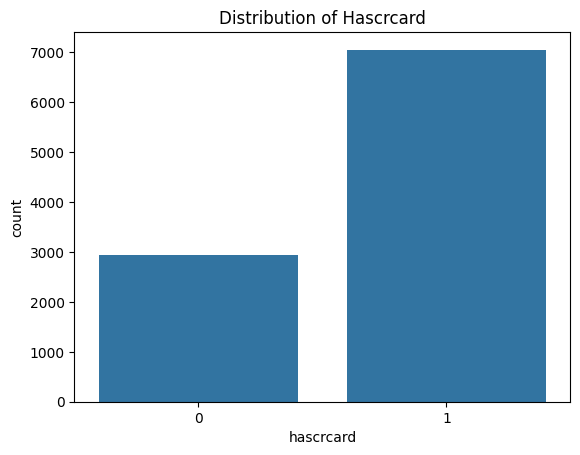

Isactivemember
isactivemember
1    5151
0    4849
Name: count, dtype: int64


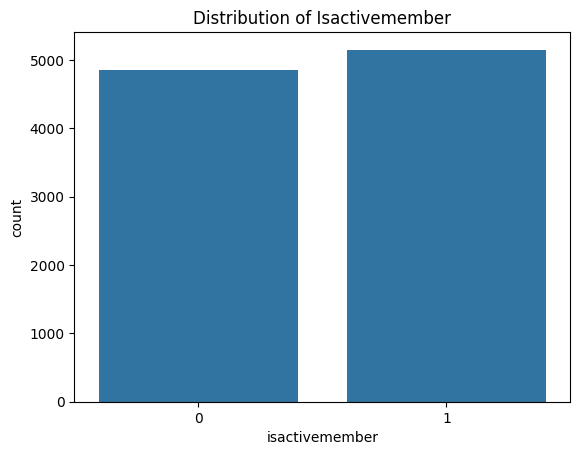

In [12]:
for col in categorical_cols:
    cat_counts = df[col].value_counts()
    print(f"{col.title()}")
    print("==============")
    print(cat_counts)
    sns.barplot(cat_counts)
    plt.title(f"Distribution of {col.title()}")
    plt.show()

### Correlation Analysis

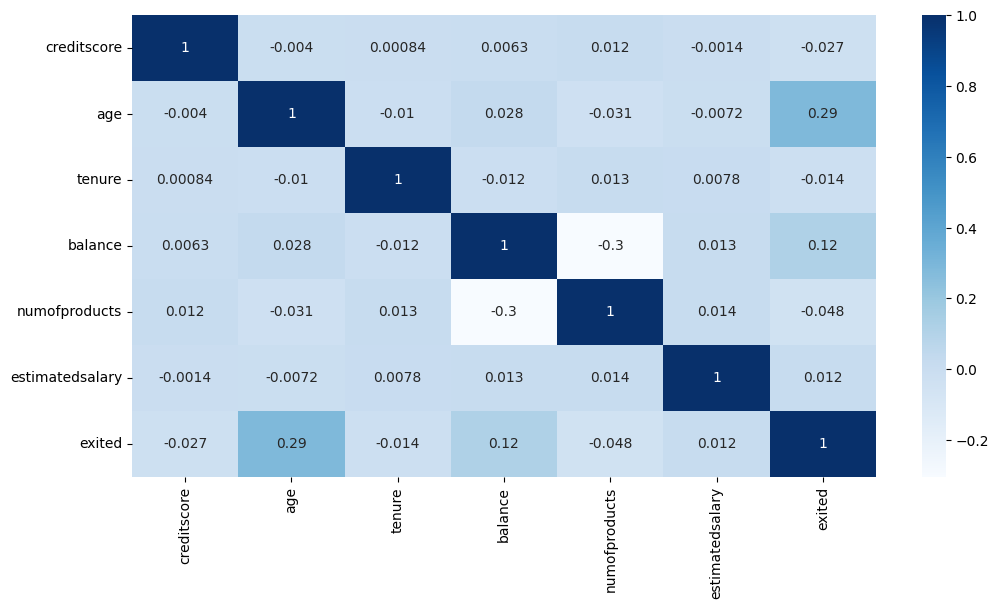

In [13]:
corr = df[numeric_cols + ["exited"]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="Blues");

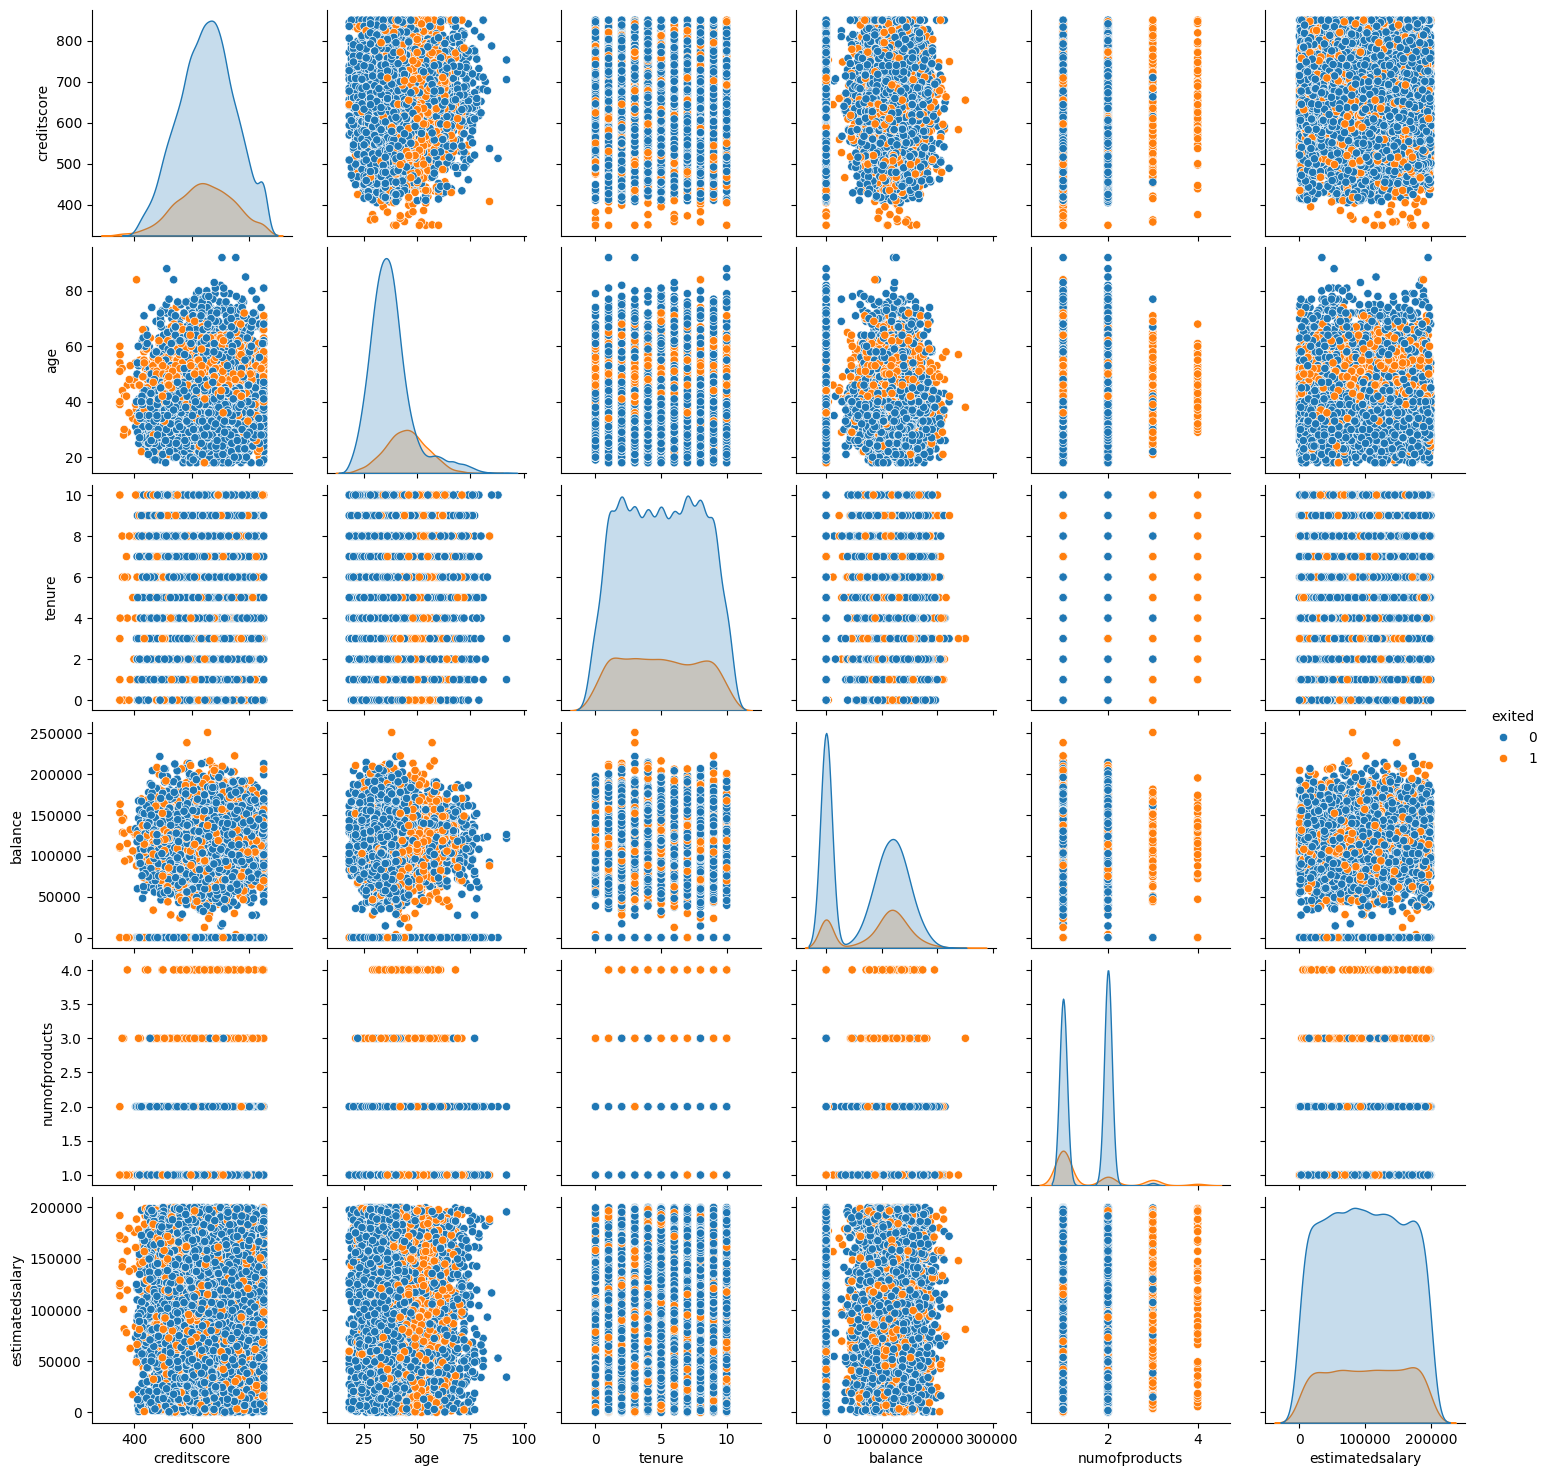

In [14]:
sns.pairplot(df[numeric_cols+["exited"]], hue="exited")

### Exploring averages values by churn

exited
0    651.853196
1    645.351497
Name: creditscore, dtype: float64


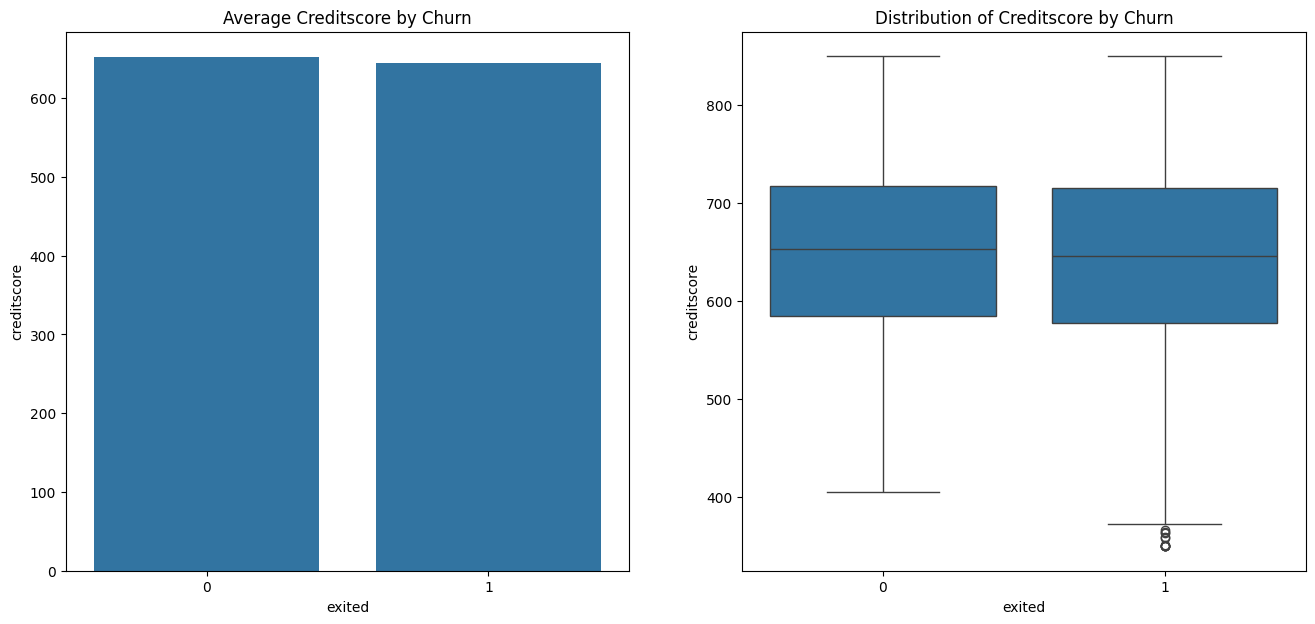

exited
0    37.408389
1    44.837997
Name: age, dtype: float64


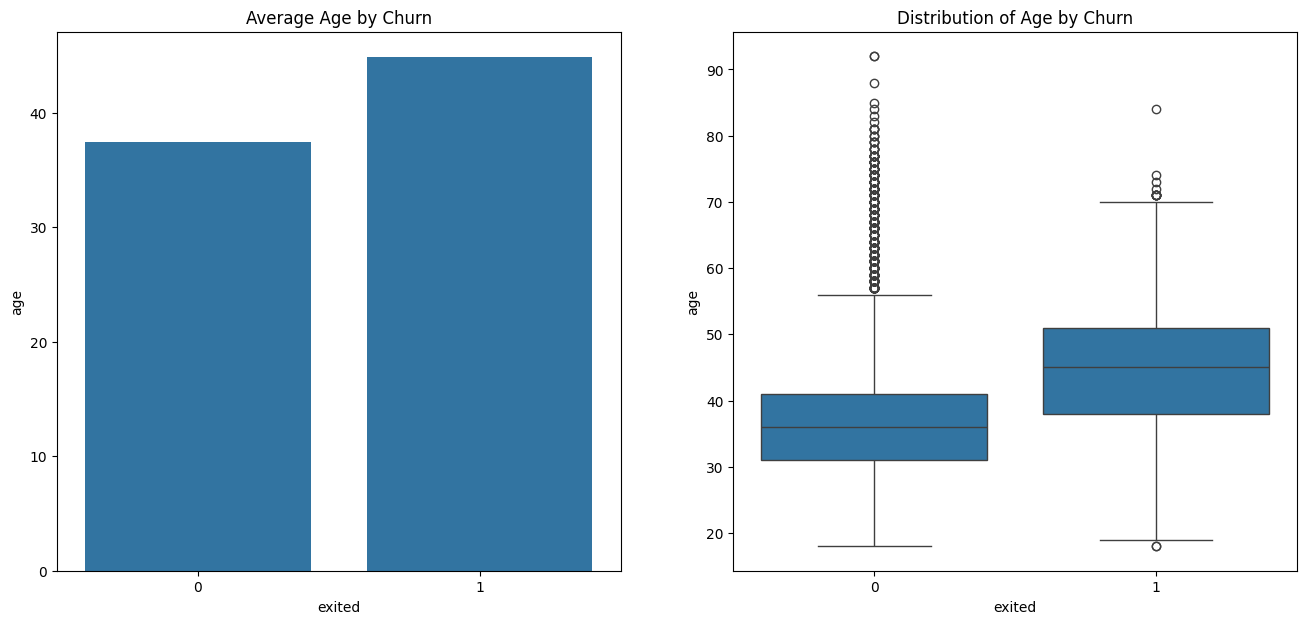

exited
0    5.033279
1    4.932744
Name: tenure, dtype: float64


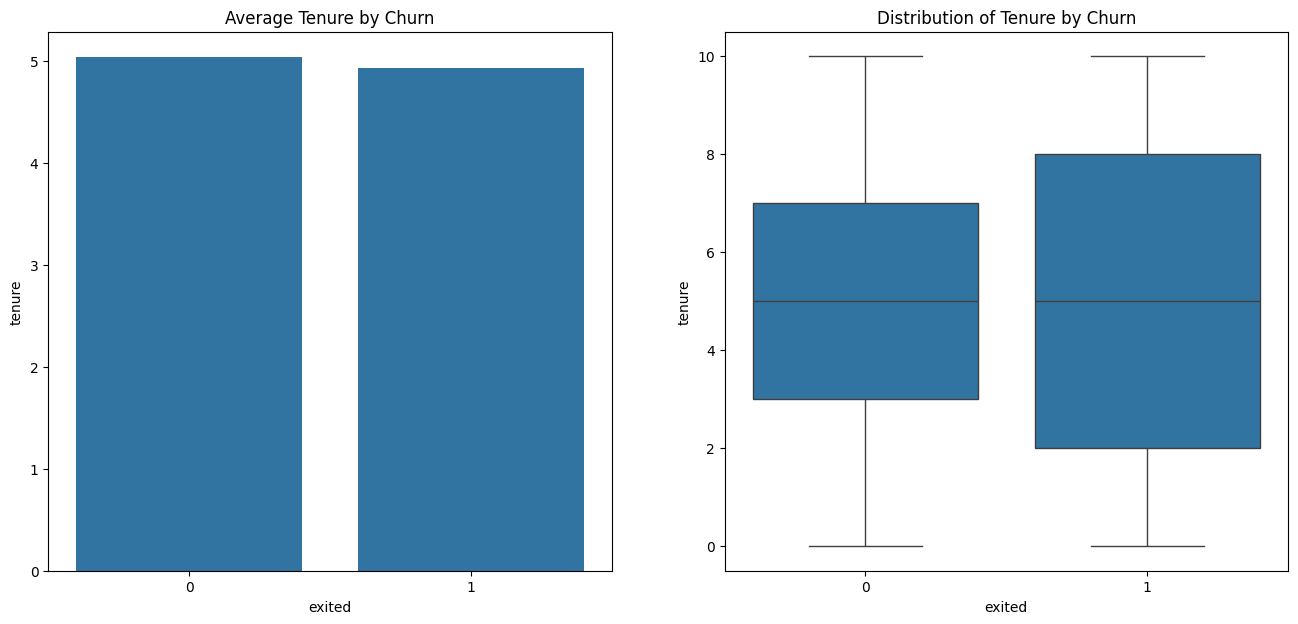

exited
0    72745.296779
1    91108.539337
Name: balance, dtype: float64


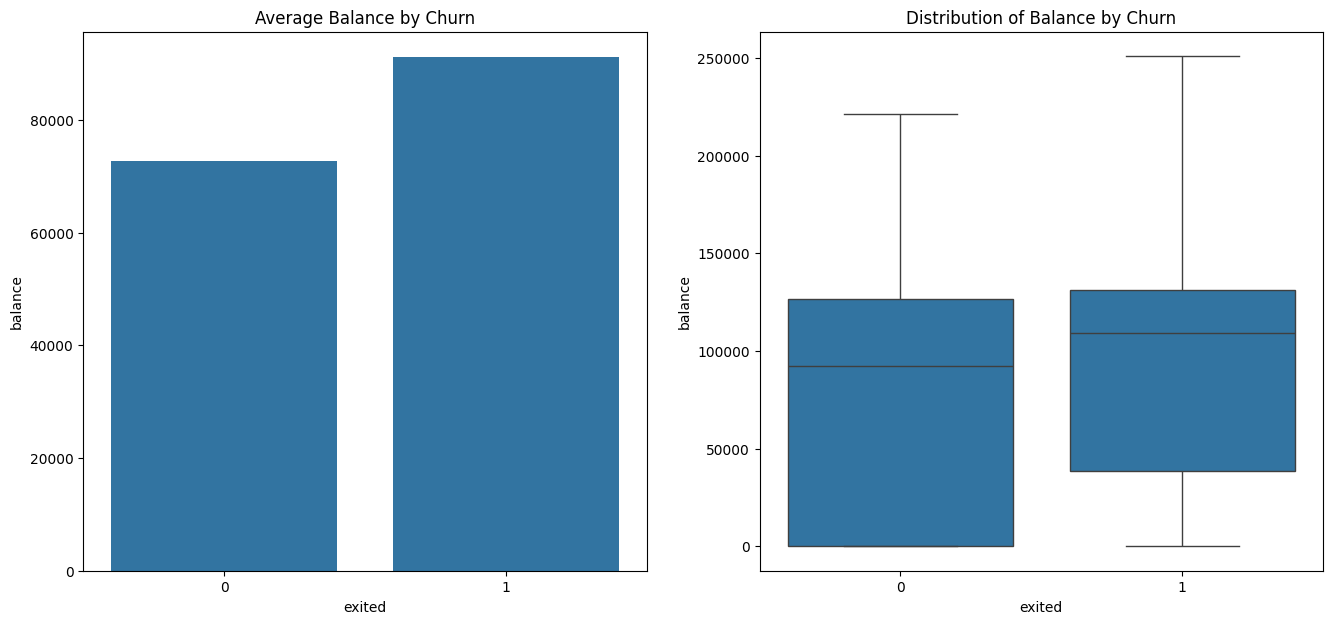

exited
0    1.544267
1    1.475209
Name: numofproducts, dtype: float64


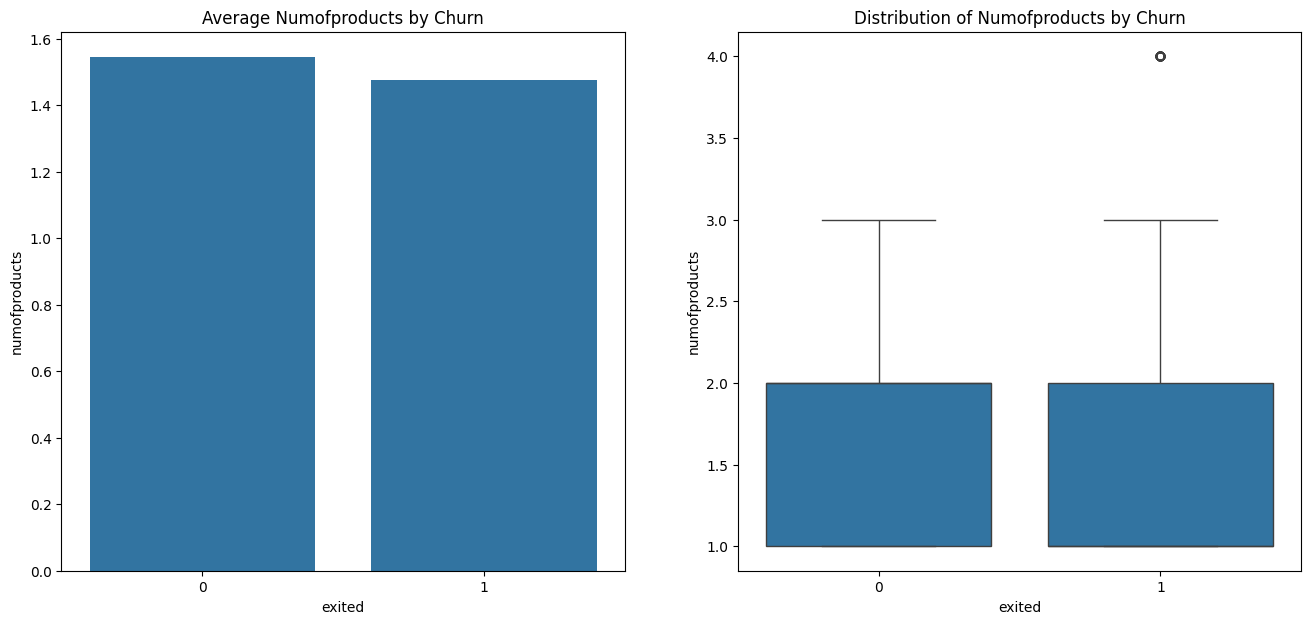

exited
0     99738.391772
1    101465.677531
Name: estimatedsalary, dtype: float64


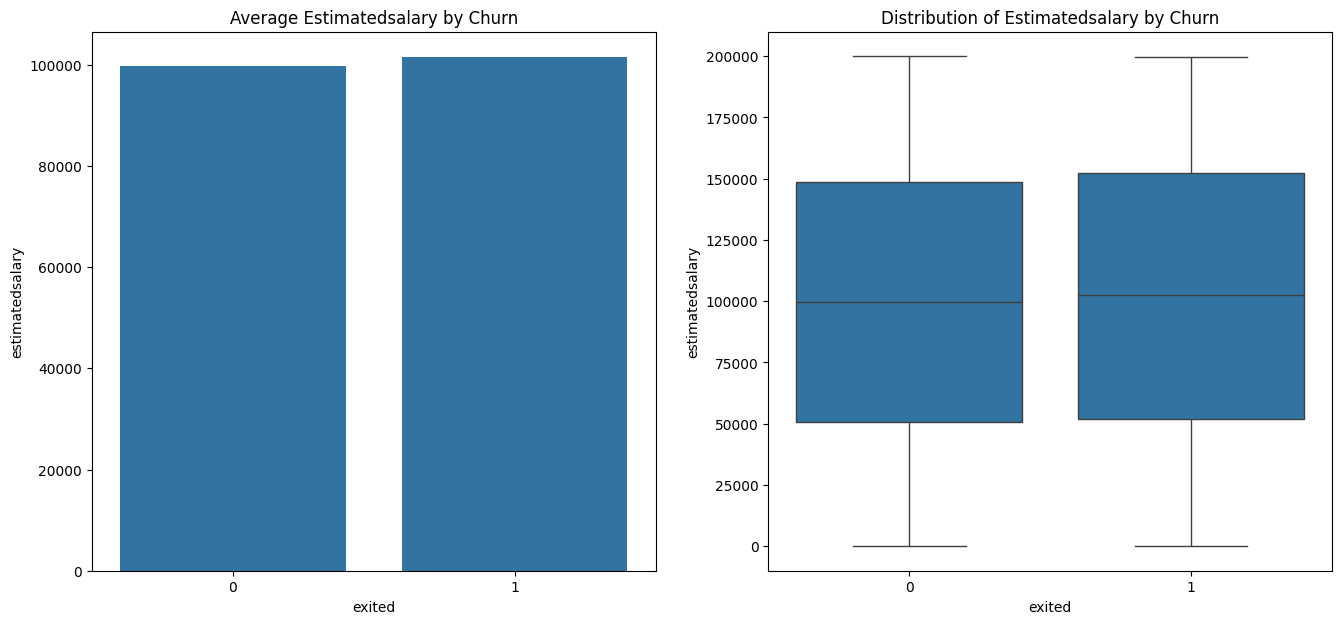

In [15]:
for col in numeric_cols:
    group_average = df.groupby("exited")[col].mean()
    print(group_average)

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    sns.barplot(group_average, ax=ax1)
    sns.boxplot(df, x="exited", y=col, ax=ax2)
    ax1.set_title(f"Average {col.title()} by Churn")
    ax2.set_title(f"Distribution of {col.title()} by Churn")
    plt.show()

### Exploring churn by category

country
france     0.161548
germany    0.324432
spain      0.166734
Name: exited, dtype: float64


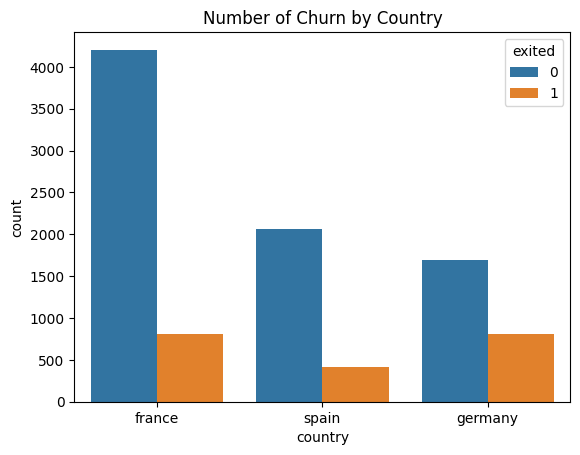

gender
female    0.250715
male      0.164559
Name: exited, dtype: float64


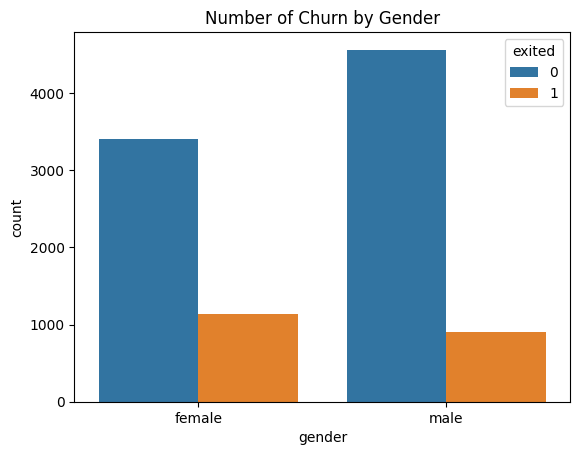

hascrcard
0    0.208149
1    0.201843
Name: exited, dtype: float64


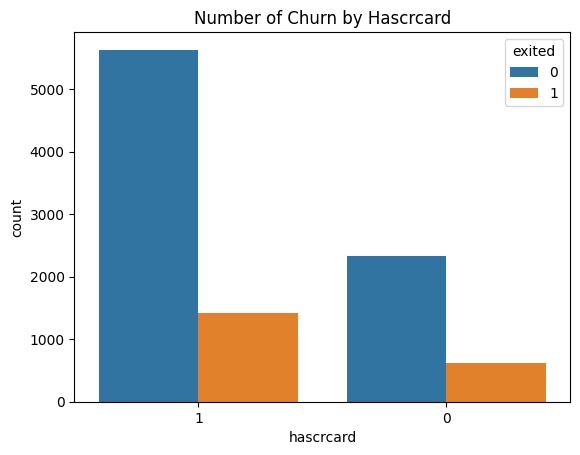

isactivemember
0    0.268509
1    0.142691
Name: exited, dtype: float64


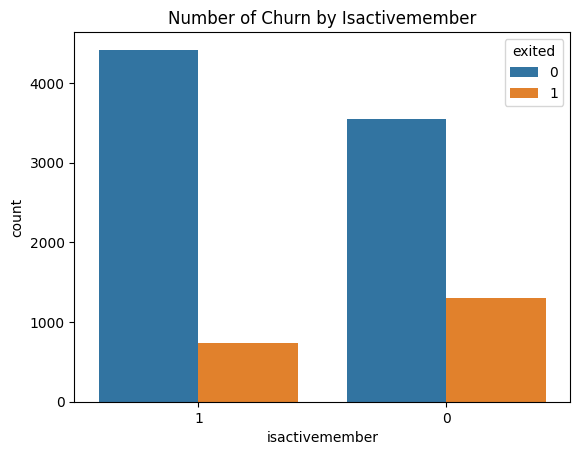

In [16]:
for col in categorical_cols:
    group_churn_rate = df.groupby(col)["exited"].mean()
    print(group_churn_rate)
    sns.countplot(x=df[col].astype(str), hue=df["exited"])
    plt.title(f"Number of Churn by {col.title()}")
    plt.show()

In [17]:
df[categorical_cols].apply(
    lambda feature: mutual_info_score(df["exited"], feature)
).sort_values(ascending=False)

country           0.014017
isactivemember    0.012291
gender            0.005652
hascrcard         0.000025
dtype: float64

### Cluster Analysis of features

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import set_config

In [19]:
set_config(transform_output="pandas")

In [95]:
# Transform categorical cols

X = df.drop("exited", axis=1)
scaler = StandardScaler()
X_scaled = pd.concat(
    [
        scaler.fit_transform(X[numeric_cols]),
        X[categorical_cols]
    ],
    axis=1
)
X_scaled["gender"] = X["gender"].map({"female": 0, "male": 1})
X_scaled = pd.concat(
    [
        X_scaled.drop("country", axis=1),
        pd.get_dummies(df["country"]).astype(int)
    ],
    axis=1
)

In [98]:
X_scaled

,creditscore,age,tenure,balance,numofproducts,estimatedsalary,gender,hascrcard,isactivemember,france,germany,spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,1,1,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,0,1,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,1,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,1,1,0,1,0,0
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,1,1,1,1,0,0
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,0,0,1,1,0,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,1,1,0,0,1,0


### Find optimal K

In [99]:
inertias = []
sl_scores = []
n_clusters = range(2, 20)

for n_cluster in n_clusters:
    _kmeans = KMeans(n_cluster, random_state=42)
    _kmeans.fit(X_scaled)
    _inertia = _kmeans.inertia_
    _sl_score = silhouette_score(X_scaled, _kmeans.labels_)

    inertias.append(_inertia)
    sl_scores.append(_sl_score)

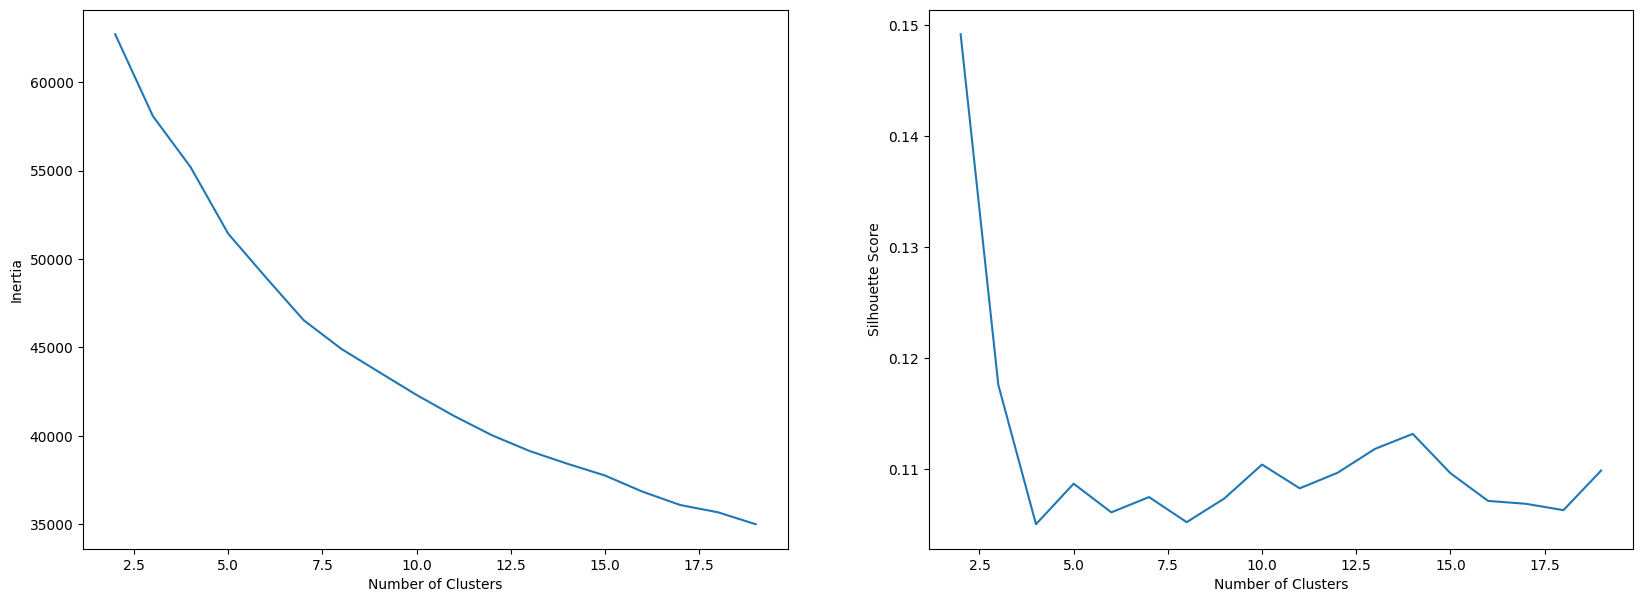

In [100]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.plot(n_clusters, inertias)
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia")

ax2.plot(n_clusters, sl_scores)
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score");

In [101]:
kmeans = KMeans(14, random_state=42)
kmeans.fit(X_scaled[numeric_cols])

,n_clusters,14
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [102]:
kmeans.inertia_

25605.201391058927

In [103]:
silhouette_score(X_scaled, kmeans.labels_)

0.10558194218665594

In [104]:
df_clustered = df.assign(cluster_label=kmeans.labels_)
df_clustered.head()

,creditscore,country,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,cluster_label
0,619,france,female,42,2,0.00,1,1,1,101348.88,1,3
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0,10
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1,12
3,699,france,female,39,1,0.00,2,0,0,93826.63,0,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0,6


### Analyze cluster result

In [105]:
df_clustered["cluster_label"].value_counts()

cluster_label
7     851
1     834
3     797
5     768
11    753
6     750
8     750
0     736
10    726
12    725
9     686
4     664
13    525
2     435
Name: count, dtype: int64

cluster_label
0     722.960598
1     580.080336
2     664.680460
3     596.634881
4     537.784639
5     665.805990
6     735.993333
7     700.062280
8     681.792000
9     731.295918
10    546.192837
11    650.095618
12    652.511724
13    640.819048
Name: creditscore, dtype: float64


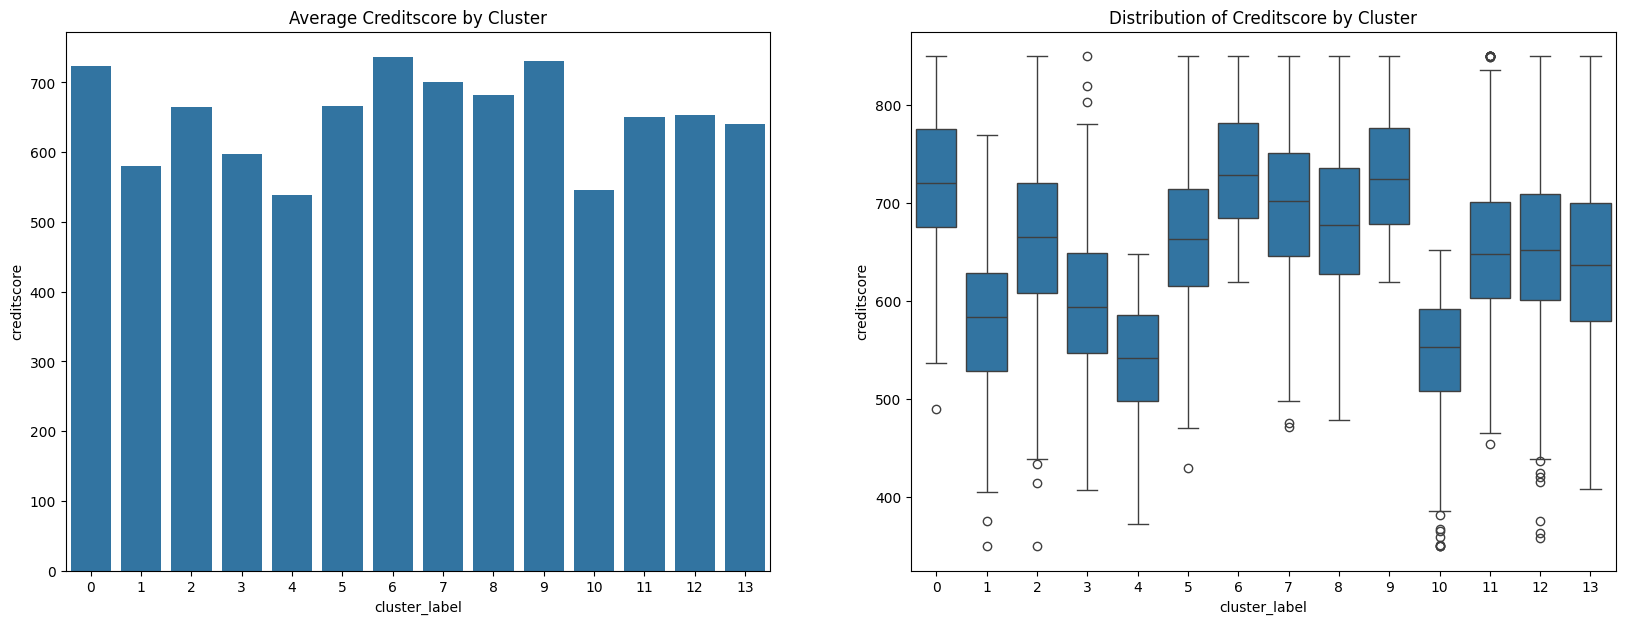

cluster_label
0     36.058424
1     35.196643
2     60.797701
3     36.228356
4     36.194277
5     36.385417
6     36.576000
7     34.951821
8     36.548000
9     37.857143
10    37.475207
11    36.831341
12    38.925517
13    61.539048
Name: age, dtype: float64


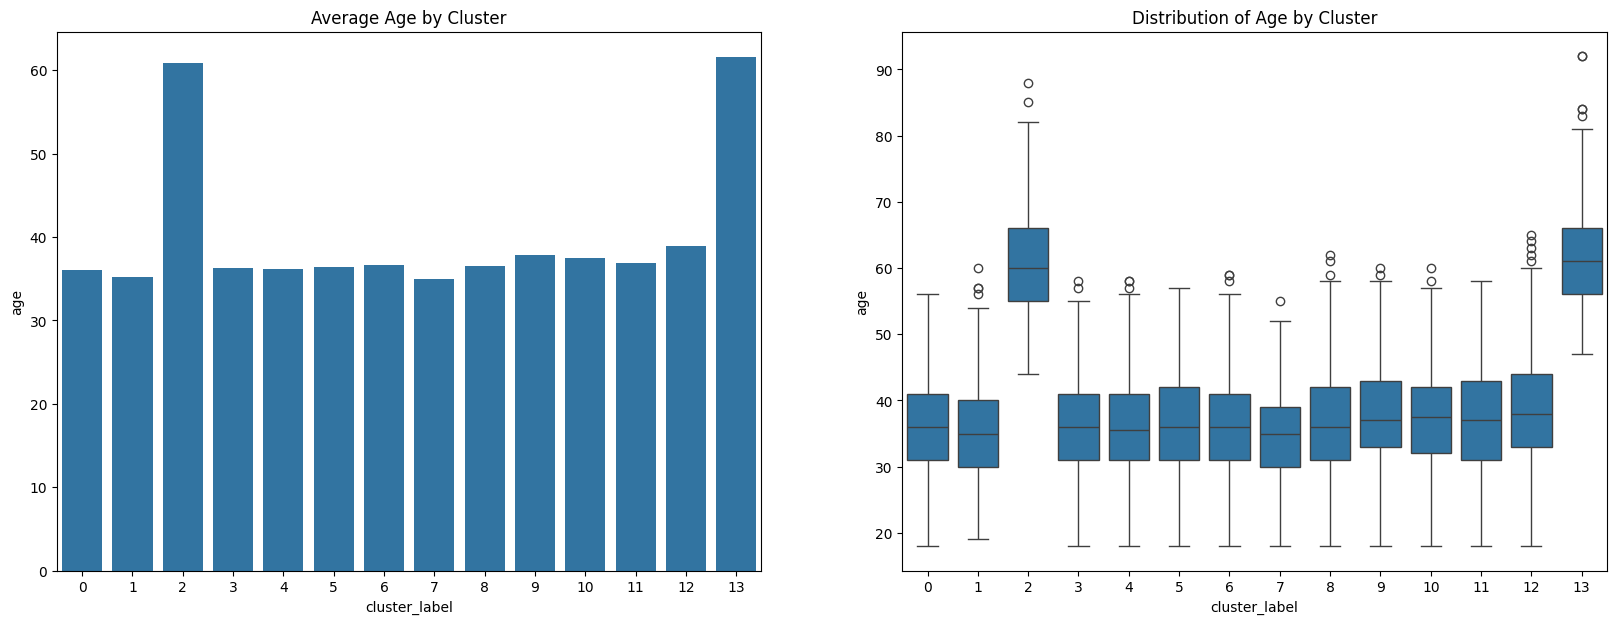

cluster_label
0     3.419837
1     6.965228
2     4.827586
3     2.485571
4     7.222892
5     2.445312
6     2.624000
7     7.505288
8     3.036000
9     7.733236
10    2.340220
11    7.628154
12    7.015172
13    4.916190
Name: tenure, dtype: float64


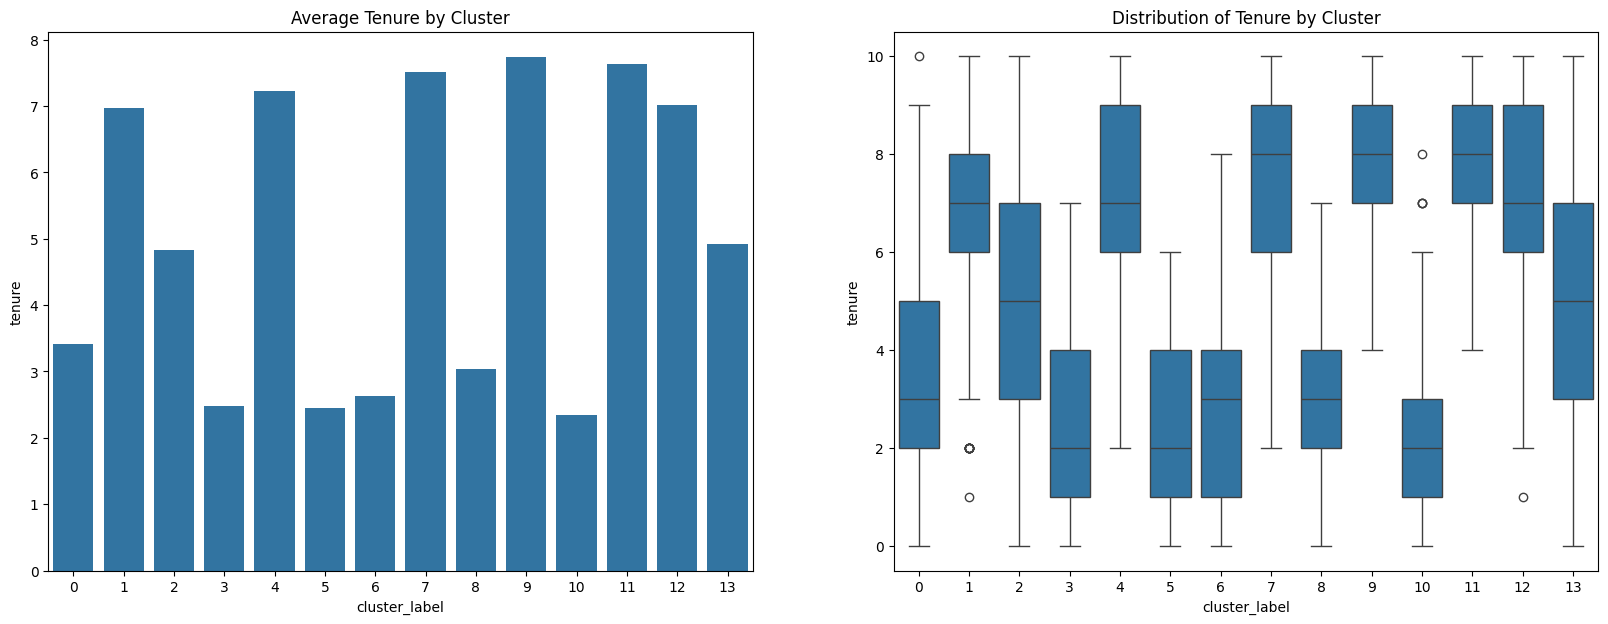

cluster_label
0       9206.540421
1       2526.511894
2       7409.602690
3       3540.404831
4     113275.930241
5     116969.423724
6      97209.794667
7       6274.894971
8     124918.474547
9     123963.264650
10    115327.148223
11    118148.190266
12    124636.151062
13    123531.256781
Name: balance, dtype: float64


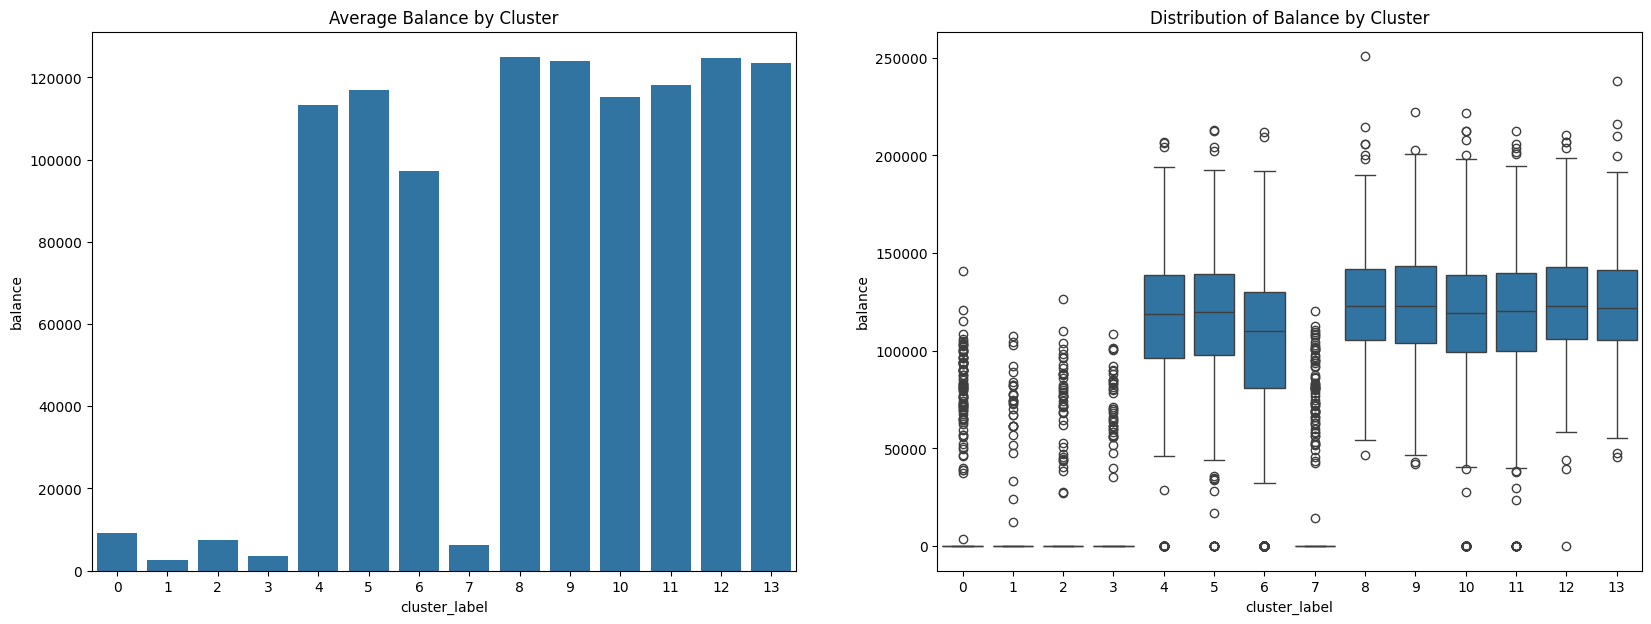

cluster_label
0     2.091033
1     1.794964
2     1.666667
3     1.828105
4     1.256024
5     1.000000
6     1.049333
7     1.815511
8     2.121333
9     1.069971
10    1.181818
11    1.000000
12    2.208276
13    1.167619
Name: numofproducts, dtype: float64


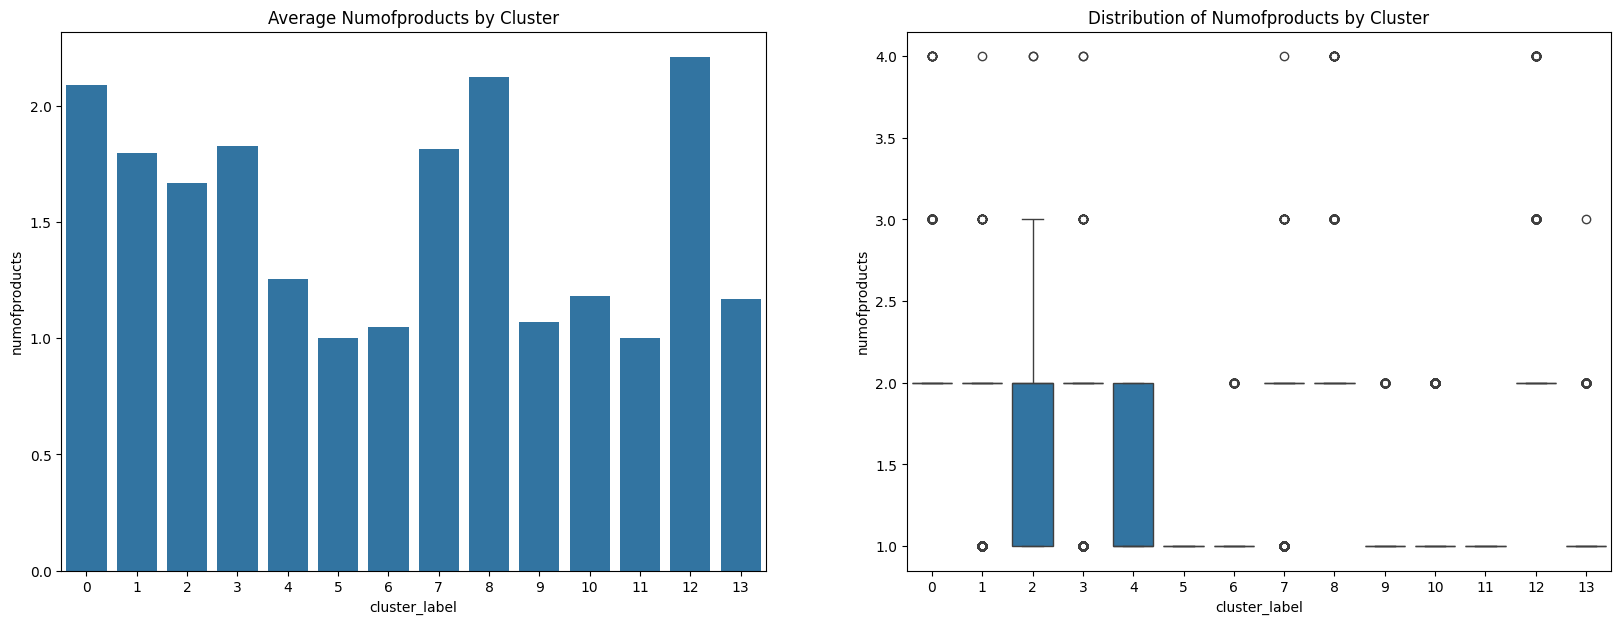

cluster_label
0     146884.926522
1     144418.114580
2      91151.036529
3      56187.658846
4      54398.969292
5      43033.310221
6     147942.329307
7      51054.767615
8      65841.674600
9      57997.468848
10    141408.304601
11    156074.398074
12    144436.453407
13     95757.845848
Name: estimatedsalary, dtype: float64


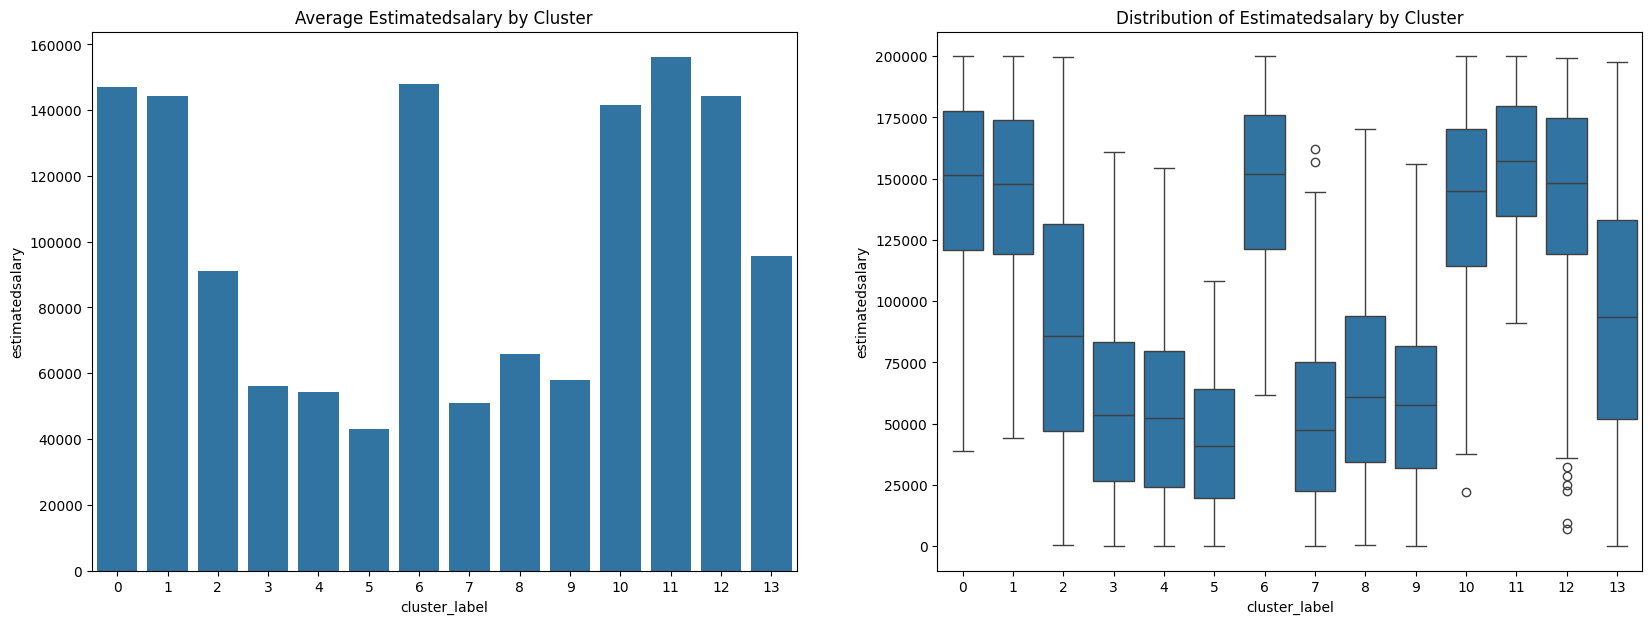

In [120]:
for col in numeric_cols:
    group_average = df_clustered.groupby("cluster_label")[col].mean()
    print(group_average)

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

    sns.barplot(group_average, ax=ax1)
    sns.boxplot(df_clustered, x="cluster_label", y=col, ax=ax2)
    ax1.set_title(f"Average {col.title()} by Cluster")
    ax2.set_title(f"Distribution of {col.title()} by Cluster")
    plt.show()

#### Analyze categories

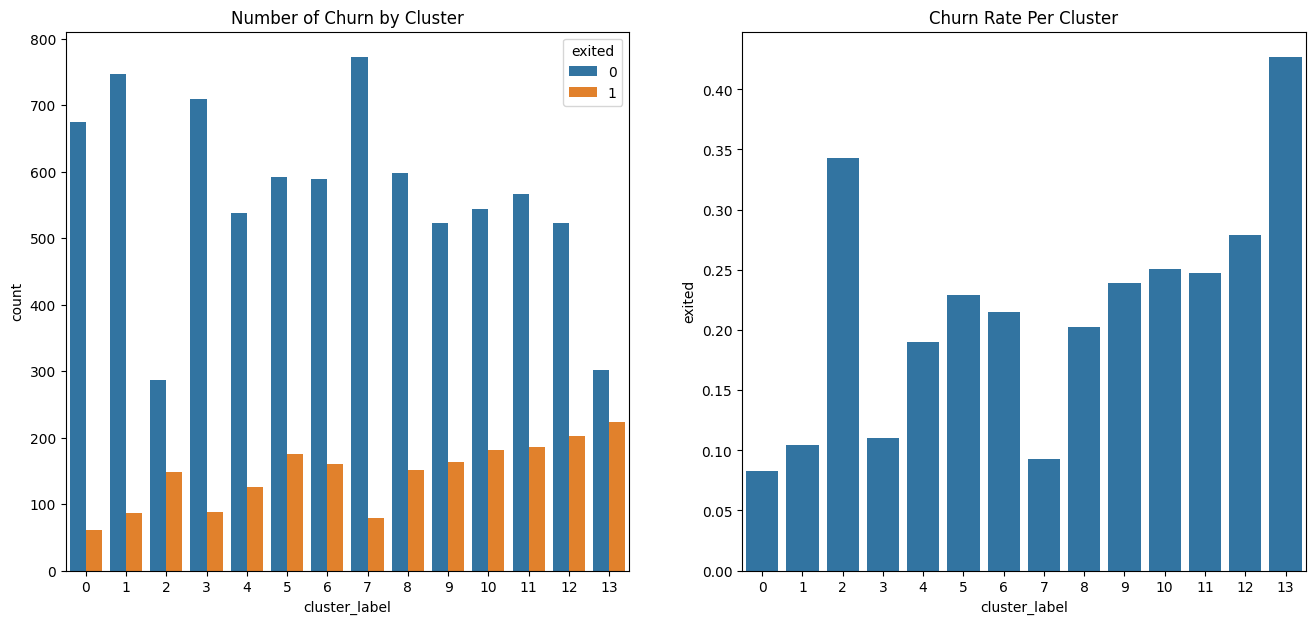

In [117]:
cluster_churn_rate = df_clustered.groupby("cluster_label")["exited"].mean()

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.countplot(
    x=df_clustered["cluster_label"],
    hue=df["exited"],
    order=cluster_churn_rate.index,
    ax=ax1,
)
sns.barplot(cluster_churn_rate, ax=ax2)
ax1.set_title("Number of Churn by Cluster")
ax2.set_title("Churn Rate Per Cluster")
plt.show()

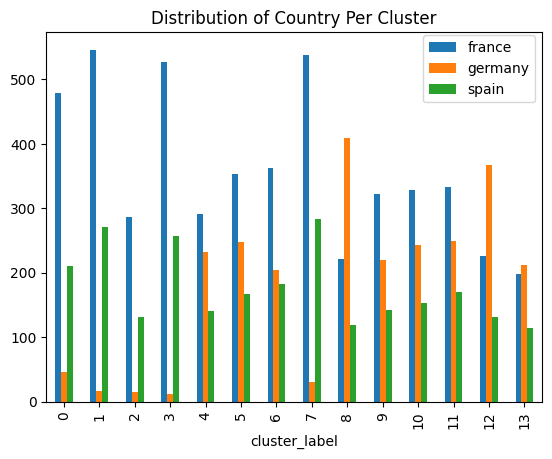

In [128]:
pd.crosstab(df_clustered["country"], df_clustered["cluster_label"]).T.plot(kind="bar")
plt.title("Distribution of Country Per Cluster")
plt.legend(bbox_to_anchor=[1, 1.01]);

In [122]:
pd.crosstab(df_clustered["country"], df_clustered["cluster_label"])

cluster_label,0,1,2,3,4,5,6,7,8,9,10,11,12,13
country,,,,,,,,,,,,,,
france,479,546,287,527,291,353,363,538,221,323,329,333,226,198
germany,46,17,16,12,232,248,205,30,410,220,244,250,367,212
spain,211,271,132,258,141,167,182,283,119,143,153,170,132,115


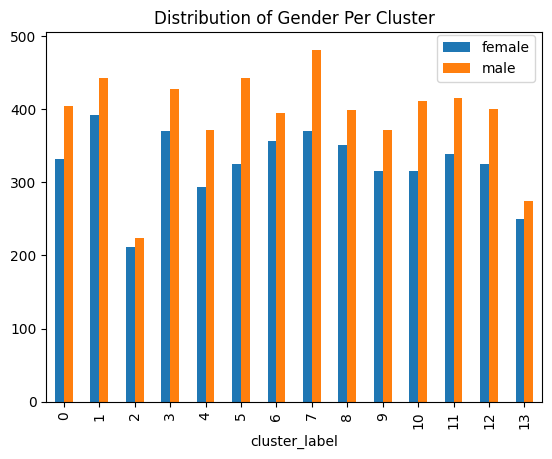

In [127]:
pd.crosstab(df_clustered["gender"], df_clustered["cluster_label"]).T.plot(kind="bar")
plt.title("Distribution of Gender Per Cluster")
plt.legend(bbox_to_anchor=[1, 1.01]);

In [129]:
pd.crosstab(df_clustered["gender"], df_clustered["cluster_label"])

cluster_label,0,1,2,3,4,5,6,7,8,9,10,11,12,13
gender,,,,,,,,,,,,,,
female,332,392,211,370,293,325,356,370,351,315,315,338,325,250
male,404,442,224,427,371,443,394,481,399,371,411,415,400,275


#### Visualize Cluster with PCA

In [135]:
pca = PCA(3)
pca_df = pca.fit_transform(
    X_scaled[numeric_cols]
)
pca_df.head()

,pca0,pca1,pca2
0,0.108803,-0.868872,-0.337048
1,-0.838216,-0.766997,-0.402084
2,0.840694,0.464010,-1.593447
3,1.340801,-0.990392,0.548428
4,-1.275429,-0.644994,2.103874


In [136]:
pca.explained_variance_ratio_

array([0.21851529, 0.16891898, 0.16685929])

In [137]:
pd.DataFrame(pca.components_, columns=X_scaled[numeric_cols].columns, index=[f"PC{i+1}" for i in range(pca.n_components_)]).T

,PC1,PC2,PC3
creditscore,0.015313,0.122781,0.954793
age,-0.134955,-0.476259,-0.152113
tenure,0.062330,0.582907,-0.067940
balance,-0.698421,0.110358,0.039413
numofproducts,0.699867,-0.043428,-0.002118
estimatedsalary,0.007839,0.635812,-0.243019


In [153]:
from matplotlib.colors import ListedColormap

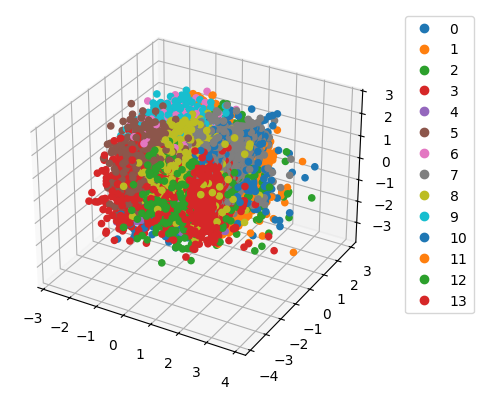

In [160]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

cmap = ListedColormap(sns.color_palette(n_colors=14).as_hex())
sc = ax.scatter(pca_df["pca0"], pca_df["pca1"], pca_df["pca2"], c = df_clustered["cluster_label"], cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

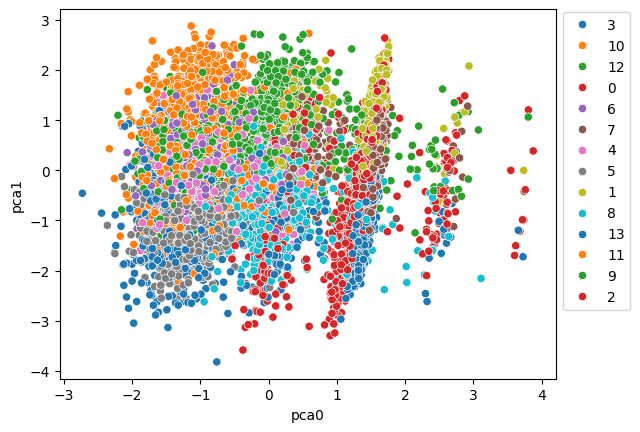

In [159]:
sns.scatterplot(pca_df, x="pca0", y="pca1", hue=df_clustered["cluster_label"].astype(str), palette=sns.color_palette(n_colors=14))
plt.legend(bbox_to_anchor=[1, 1.01])